<a href="https://colab.research.google.com/github/arslanshaheen/ArslanPortfolio/blob/main/FCC_RikhaSamba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install rasterio



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 46.3 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
band3 = "/content/drive/MyDrive/landsat_rikha/LC09_L2SP_141040_20251010_20251011_02_T1_SR_B3.TIF"
band4 = "/content/drive/MyDrive/landsat_rikha/LC09_L2SP_141040_20251010_20251011_02_T1_SR_B4.TIF"
band5 = "/content/drive/MyDrive/landsat_rikha/LC09_L2SP_141040_20251010_20251011_02_T1_SR_B5.TIF"


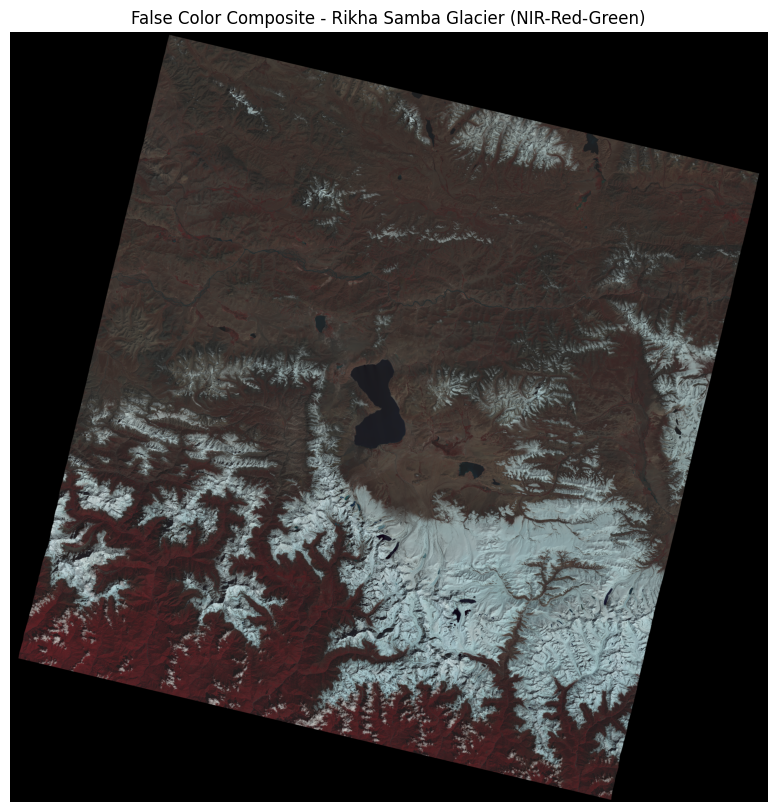

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open each band
with rasterio.open(band5) as nir:
    nir_data = nir.read(1)
with rasterio.open(band4) as red:
    red_data = red.read(1)
with rasterio.open(band3) as green:
    green_data = green.read(1)

# Stack the bands (NIR, Red, Green)
fcc = np.dstack((nir_data, red_data, green_data))

# Normalize values for display
fcc_normalized = (fcc - np.min(fcc)) / (np.max(fcc) - np.min(fcc))

# Display FCC
plt.figure(figsize=(10,10))
plt.imshow(fcc_normalized)
plt.title("False Color Composite - Rikha Samba Glacier (NIR-Red-Green)")
plt.axis('off')
plt.show()


In [11]:
plt.imsave("Rikha_Samba_FCC.png", fcc_normalized)


In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import xarray as xr
ds = xr.open_dataset('/content/drive/MyDrive/ERA5_Land/data_stream-mnth.nc')
ds


<xarray.Dataset> Size: 560B
Dimensions:     (valid_time: 3, latitude: 3, longitude: 3)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 24B 1999-01-02 1999-12-02 2025-01-02
  * latitude    (latitude) float64 24B 28.9 28.8 28.7
  * longitude   (longitude) float64 24B 83.4 83.5 83.6
    number      int64 8B ...
    expver      (valid_time) <U4 48B ...
Data variables:
    d2m         (valid_time, latitude, longitude) float32 108B ...
    t2m         (valid_time, latitude, longitude) float32 108B ...
    sp          (valid_time, latitude, longitude) float32 108B ...
    lai_hv      (valid_time, latitude, longitude) float32 108B ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-17T19:10 GRIB to CDM+CF via cfgrib-0.9.1...

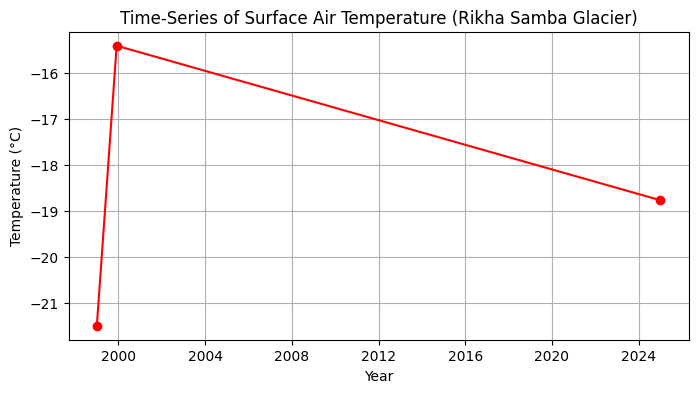

In [14]:
import matplotlib.pyplot as plt

# Select temperature variable (Kelvin)
temp = ds['t2m']

# Convert from Kelvin to Celsius
temp_c = temp - 273.15

# Take average across latitude & longitude for single value per time
temp_mean = temp_c.mean(dim=["latitude", "longitude"])

# Plot time-series
plt.figure(figsize=(8,4))
temp_mean.plot(marker='o', color='red')
plt.title('Time-Series of Surface Air Temperature (Rikha Samba Glacier)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()
